<a href="https://colab.research.google.com/github/AmeerHamza-345/Q2/blob/main/Assignment_05_Exploring_Gemini_2_0_Video_and_Audio_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --quiet google-generativeai # installation of requird libary as google-generativeai

In [2]:

from google.colab import userdata
GOOGLE_API_KEY: str = userdata.get('GOOGLE_API_KEY')

if GOOGLE_API_KEY:
  print("API key fetched successfully!")
else:
  print("API key not found. Please set the 'GEMINI_API_KEY' user data.")

API key fetched successfully!


In [3]:
import google.generativeai as genai
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
from google.generativeai.generative_models import GenerativeModel
#model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [5]:
model: GenerativeModel = genai.GenerativeModel("gemini-2.0-flash-exp")

In [6]:
from IPython.display import display

In [7]:
from IPython.display import Markdown

Saving car _text_features.jpg to car _text_features.jpg
Uploaded image filename: car _text_features.jpg


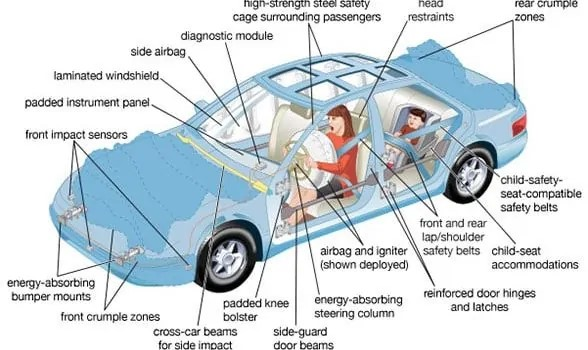

In [21]:
# prompt: load inage file from locally C:\Users\SNE\Downloads

# The provided path is for a local file system.  Colab operates within its own file system.
# You need to upload the image file into the Colab environment first.

from google.colab import files

uploaded = files.upload()

#  download first and upload the image for this link  https://github.com/AmeerHamza-345/Q2/blob/main/car%20_text_features.jpg

# Assuming the uploaded file is named 'image.jpg'
# Adjust the filename if necessary.
image_filename = list(uploaded.keys())[0]

# Now you can work with image_filename in Colab
print(f"Uploaded image filename: {image_filename}")


# Example using the image file (replace with your actual image processing code):
from PIL import Image
img = Image.open(image_filename)
display(img)

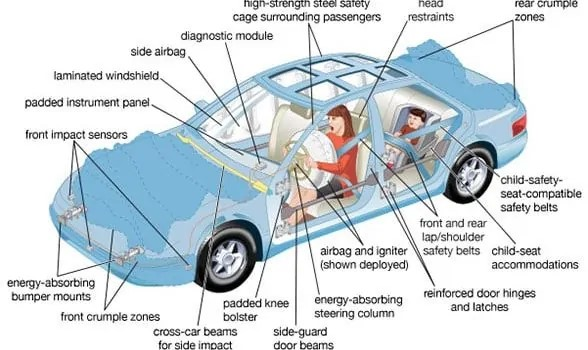

In [25]:
from PIL import Image
img = Image.open(image_filename)
display(img)

In [23]:
# Write a prompt and store it in some variable
prompt = """This image contains a sketch of a potential product along with some notes.
 Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

In [27]:
import google.generativeai as genai

model = genai.GenerativeModel("gemini-2.0-flash-exp")
from google.generativeai.types import GenerateContentResponse
response_1: GenerateContentResponse = model.generate_content([prompt, img]) # respons of model (gemini 1.5 flash)


In [28]:
print(response_1.text)

```json
{
"description": "This is a sketch of a car, with a focus on safety features. The car is designed with a high-strength steel safety cage surrounding passengers to ensure occupant protection in the event of an accident. The sketch highlights numerous safety components, including front and rear crumple zones designed to absorb impact energy. The interior includes front and rear lap/shoulder safety belts as well as child-safety-seat-compatible safety belts and child-seat accommodations. Both a side airbag and a frontal airbag with igniter are displayed as well as side-guard door beams, padded instrument panel, and padded knee bolster to further protect occupants from impact. For protection during front impact, there are front impact sensors and energy-absorbing bumper mounts. The car also features an energy-absorbing steering column, a laminated windshield, head restraints, and cross car beams for side impact. Additionally, the car includes a diagnostic module.",
  "features": [
 

In [29]:
# Load sample images
!wget https://storage.googleapis.com/generativeai-downloads/videos/Pottery.mp4 -O Pottery.mp4 -q

In [32]:
# prompt: video uploading function to save path and to view this file

from google.colab import files
from IPython.display import HTML
import os

def upload_and_display_video():
    """Uploads a video file, saves its path, and displays it in the notebook."""

    uploaded = files.upload()
    if uploaded:
        video_filename = next(iter(uploaded))  # Get the filename of the uploaded video
        video_path = video_filename  # Save the video path (it's in the Colab environment)

        print(f"Uploaded video filename: {video_filename}")
        print(f"Video path: {video_path}")

        # Display the video using HTML
        video_html = f"""<video width="640" height="360" controls>
                          <source src="{video_path}" type="video/mp4">
                          Your browser does not support the video tag.
                        </video>"""
        display(HTML(video_html))
    else:
        print("No video file uploaded.")

upload_and_display_video()

Saving test.mp4 to test.mp4
Uploaded video filename: test.mp4
Video path: test.mp4


In [44]:
# Upload all the videos using the File API.
# You can find more details about how to use it in the Get Started notebook.
# This can take a couple of minutes as the videos will need to be processed and tokenized.

import time

def upload_video(video_file):
  video_file = client.files.upload(path=video_file)
  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name or "")

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)
  print(f'Video processing complete: ' + (video_file.uri or ""))

  return video_file

pottery_video = upload_video('test.mp4')

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/edvlj897exio


In [45]:
# Initilize and configure the client
# Select the model
from google import genai
from google.genai import Client

client: Client = genai.Client(
    api_key=GOOGLE_API_KEY,
)
model: str = "gemini-2.0-flash-exp"
# model:str= model

In [46]:
from google.genai.types import Content, Part
prompt = """For each scene in this video,
            generate captions that describe the scene along with any spoken text placed in quotation marks.
            Place each caption into an object with the timecode of the caption in the video.
         """

video = pottery_video

response = client.models.generate_content(
    model=model,
    contents=[
        Content(
            role="user",
            parts=[
                Part.from_uri(
                    file_uri=video.uri or "",
                    mime_type=video.mime_type or ""),
                ]),
        prompt,
    ]
)

Markdown(response.text)


```json
[
  {
    "timecode": "00:00",
    "caption": "A woman in a black dress is standing in a parking garage. There are several parking payment kiosks and a few parked cars in the background. Text at the bottom reads, \"The is the espaoainutonento for tepecens chertuery teckedc-bouuhing to eplcicitul the conaonnenc lich he d exme your hve eem!\" "
  },
  {
    "timecode": "00:01",
    "caption": "A woman in a black dress is standing in a parking garage. There are several parking payment kiosks and a few parked cars in the background. Text at the bottom reads, \"The is the espaoainutonento for tepecens chertuery teckedc-bouuhing to eplcicitul the conaonnenc lich he d exme your hve eem!\" "
  },
  {
    "timecode": "00:02",
    "caption":"A woman in a black dress is standing in a parking garage. There are several parking payment kiosks and a few parked cars in the background. Text at the bottom reads, \"The is the espaoainutonento for tepecens chertuery teckedc-bouuhing to eplcicitul the conaonnenc lich he d exme your hve eem!\" "
  },
  {
    "timecode": "00:03",
    "caption":"A woman in a black dress is standing in a parking garage. There are several parking payment kiosks and a few parked cars in the background. Text at the bottom reads, \"The is the espaoainutonento for tepecens chertuery teckedc-bouuhing to eplcicitul the conaonnenc lich he d exme your hve eem!\" "
  }
]
```


In [47]:
import asyncio
import base64
import contextlib
import datetime
import os
import json
import wave
import itertools

from IPython.display import display, Audio

from google import genai
from google.genai import types

async def async_enumerate(it):
  n = 0
  async for item in it:
    yield n, item
    n +=1

In [48]:
@contextlib.contextmanager
def wave_file(filename, channels=1, rate=24000, sample_width=2):
    with wave.open(filename, "wb") as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(sample_width)
        wf.setframerate(rate)
        yield wf


In [43]:
# Upload all the videos using the File API.
# You can find more details about how to use it in the Get Started notebook.
# This can take a couple of minutes as the videos will need to be processed and tokenized.

import time

def upload_video(video_file):
  video_file = client.files.upload(path=video_file)
  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name or "")

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)
  print(f'Video processing complete: ' + (video_file.uri or ""))

  return video_file

pottery_video = upload_video('test.mp4')

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/o1oq78fnbfs9


In [49]:

from google.genai.types import Content, Part
prompt = """For each scene in this video,
            generate captions that describe the scene along with any spoken text placed in quotation marks.
            Place each caption into an object with the timecode of the caption in the video.
         """

video = pottery_video

response = client.models.generate_content(
    model=model,
    contents=[
        Content(
            role="user",
            parts=[
                Part.from_uri(
                    file_uri=video.uri or "",
                    mime_type=video.mime_type or ""),
                ]),
        prompt,
    ]
)

Markdown(response.text)

```json
[
  {
    "timecode": "00:00",
    "caption": "A woman wearing a black dress is standing in a parking garage. There are multiple payment kiosks and several cars in the background. Text at the bottom reads, \"The is the ēsppoainutonento for tepecens chertuery teckedc-bouuhing to eplccitul the conaonnenclich he d exme your hve eem!\""
  },
  {
    "timecode": "00:01",
     "caption": "A woman wearing a black dress is standing in a parking garage. There are multiple payment kiosks and several cars in the background. Text at the bottom reads, \"The is the ēsppoainutonento for tepecens chertuery teckedc-bouuhing to eplccitul the conaonnenclich he d exme your hve eem!\""
  },
    {
    "timecode": "00:02",
     "caption": "A woman wearing a black dress is standing in a parking garage. There are multiple payment kiosks and several cars in the background. Text at the bottom reads, \"The is the ēsppoainutonento for tepecens chertuery teckedc-bouuhing to eplccitul the conaonnenclich he d exme your hve eem!\""
  },
    {
    "timecode": "00:03",
     "caption": "A woman wearing a black dress is standing in a parking garage. There are multiple payment kiosks and several cars in the background. Text at the bottom reads, \"The is the ēsppoainutonento for tepecens chertuery teckedc-bouuhing to eplccitul the conaonnenclich he d exme your hve eem!\""
  }
]
```


In [50]:
from google import genai
client = genai.Client(
    api_key=GOOGLE_API_KEY,
    http_options= {'api_version': 'v1alpha'}
  )
MODEL = "gemini-2.0-flash-exp"

In [51]:
import asyncio
import base64
import contextlib
import datetime
import os
import json
import wave
import itertools

from IPython.display import display, Audio

from google import genai
from google.genai import types

async def async_enumerate(it):
  n = 0
  async for item in it:
    yield n, item
    n +=1

In [52]:
@contextlib.contextmanager
def wave_file(filename, channels=1, rate=24000, sample_width=2):
    with wave.open(filename, "wb") as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(sample_width)
        wf.setframerate(rate)
        yield wf

In [53]:
config={
    "generation_config": {"response_modalities": ["AUDIO"]}}

async with client.aio.live.connect(model=MODEL, config=config) as session:
  file_name = 'audio.wav'
  with wave_file(file_name) as wav:
    message = "Hello? Gemini are you there?"
    print("> ", message, "\n")
    await session.send(message, end_of_turn=True)

    turn = session.receive()
    async for n,response in async_enumerate(turn):
      if response.data is not None:
        wav.writeframes(response.data)

        if n==0:
          print(response.server_content.model_turn.parts[0].inline_data.mime_type)
        print('.', end='')


display(Audio(file_name, autoplay=True))


>  Hello? Gemini are you there? 

audio/pcm;rate=24000
...............